In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import pandas_profiling
%matplotlib inline



data=pd.read_excel('2021-04-07 Mitra_Inbound-By_Subject.xlsx')

print(data.head())

  Title       First Name   Last Name Title2 Gender                 Position  \
0    Dr       Bertrand       Collard    NaN   Male                 Lecturer   
1   NaN   Ernst Sigmund      Beitler    NaN   Male                 Lecturer   
2   NaN      Jan Daniel      Westrik    NaN   Male                 Lecturer   
3   Dr.  Muhammad Arief      Budiman   Ph.D   Male                 Research   
4   NaN           Navin   Singhania     NaN   Male  Founder Barracude Labs    

                                 Department InstitutionName  \
0                 Agronomi dan Hortikultura   Not Available   
1           Poultry Science and Animal Feed   Not Available   
2                             Dairy Science   Not Available   
3                         Orion Genomic USA   Not Available   
4  Biomass Fractionation and Natural Fibers   Not Available   

         Discipline/Subject Country  ...                     Email  \
0  Agriculture and Forestry   Japan  ...        yai@dpi.nsw.gov.au   
1  Agr

In [3]:
print(data.dtypes)

len_data_subject=len(data['Discipline/Subject'])
len_data_country=len(data['Country'])
len_data_continent= len(data['Continent'])
count_data_subject= data['Discipline/Subject'].count()
count_data_country= data['Country'].count()
count_data_continent= data['Continent'].count()
#Subject
missing_data_subject = len_data_subject - count_data_subject
float_data_subject = float(missing_data_subject/len_data_subject)
pct_data_missing_subject= '{0:.1f}%'.format(float_data_subject * 100)
print('Presentase Missing Value Kolom Subject:', pct_data_missing_subject)
#Country
missing_data_country = len_data_country - count_data_country
float_data_country = float(missing_data_country/len_data_country)
pct_data_missing_country= '{0:.1f}%'.format(float_data_country * 100)
print('Presentase Missing Value Kolom country:', pct_data_missing_country)
#Continent
missing_data_continent = len_data_continent - count_data_continent
float_data_continent = float(missing_data_continent/len_data_continent)
pct_data_missing_continent= '{0:.1f}%'.format(float_data_continent * 100)
print('Presentase Missing Value Kolom country:', pct_data_missing_continent)


Title                  object
First Name             object
Last Name              object
Title2                 object
Gender                 object
Position               object
Department             object
InstitutionName        object
Discipline/Subject     object
Country                object
Continent              object
Email                  object
AlternativeEmail       object
Institution email      object
Phone                  object
Tahun                 float64
Sumber                 object
Bouncing              float64
Sent, no response      object
Respond                object
Automatic reply        object
dtype: object
Presentase Missing Value Kolom Subject: 0.0%
Presentase Missing Value Kolom country: 0.0%
Presentase Missing Value Kolom country: 0.0%


In [5]:
print(data.isnull().values.any())
print(data.shape)

data=data.fillna('-')
data.drop_duplicates(inplace=True)

print(data.shape)
print(data.head())

profile=pandas_profiling.ProfileReport(data)
print(profile)

False
(2914, 21)
(2914, 21)
  Title       First Name   Last Name Title2 Gender                 Position  \
0    Dr       Bertrand       Collard      -   Male                 Lecturer   
1     -   Ernst Sigmund      Beitler      -   Male                 Lecturer   
2     -      Jan Daniel      Westrik      -   Male                 Lecturer   
3   Dr.  Muhammad Arief      Budiman   Ph.D   Male                 Research   
4     -           Navin   Singhania       -   Male  Founder Barracude Labs    

                                 Department InstitutionName  \
0                 Agronomi dan Hortikultura   Not Available   
1           Poultry Science and Animal Feed   Not Available   
2                             Dairy Science   Not Available   
3                         Orion Genomic USA   Not Available   
4  Biomass Fractionation and Natural Fibers   Not Available   

         Discipline/Subject Country  ...                     Email  \
0  Agriculture and Forestry   Japan  ...        

In [92]:
data1= data[['Discipline/Subject','Country','Continent']]
data1 = data1.drop(data1['Others'].indeks)
data_index=data1.set_index(['Discipline/Subject','Country'])




print(data_index.head())
print(data1.info())
print(data1.count())

KeyError: 'Others'

In [33]:
dataset1= data1.groupby(['Discipline/Subject'])[['Discipline/Subject']].count()
print(dataset1)

                                   Discipline/Subject
Discipline/Subject                                   
Agriculture and Forestry                          671
Company                                           175
Economic/Econometric                              221
Environmental/Engineering Science                 434
Fisheries/Marine                                  187
Natural / Medical Science                         344
Non-Academic                                      138
Others                                            744


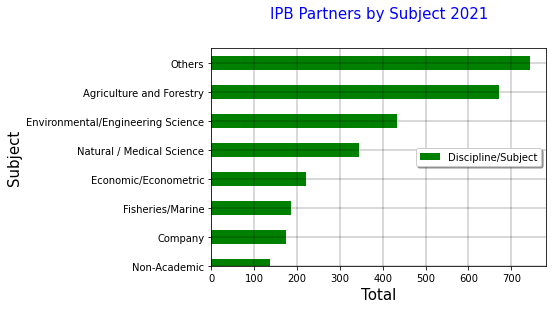

In [85]:
plt.clf()
data1.groupby('Discipline/Subject')['Discipline/Subject'].count().sort_values(ascending=True).plot(kind='barh',color='green')
plt.title('IPB Partners by Subject 2021',loc='center',pad=30, fontsize=15, color='blue')
plt.ylabel('Subject', fontsize = 15)
plt.xlabel('Total', fontsize = 15)
plt.ylim(ymin=0)
plt.grid(color='black', linestyle='-',linewidth=0.3)
labels, locations = plt.yticks()
plt.legend(loc='right', bbox_to_anchor=(1, 0.5), shadow=True, ncol=2)
plt.yticks(rotation=0)
plt.xticks
plt.show()